In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

## Training Data load and description

RLWM_train_data.csv: RLWM training phase data. Each row represents a trial from a block of a participant. 

id: de-identfied subject ID  
block: block number (0 for practice block, excluded from analyses)  
trial: trial number in block  
stimulus: stimulus presented for this trial (1:x, x = set size)  
rt: response time in milliseconds  
key_press: action for the trial (0 = J, 1 = K, 2 = L)  
key_answer: correct action for the trial (0 = J, 1 = K, 2 = L)  
correct: whether response was corect  
set_size: set size of this block  
set: image folder used for this block  
img_num: image file used for this trial's stimulus  
iteration: how many times this stimulus has been seen so far  
delay: how many trials since last presentation of this stimulus  
reward_history: how many correct responses for this stimulus since block start  



In [2]:
df2 = pd.read_excel('impulsivity_rlwm/S-UPPS-P_Scale_2192021.xlsx')

In [123]:
df2

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q2_15,Q2_16,Q2_17,Q2_18,Q2_19,Q2_20,SC0,id,prev_dur,Q_TotalDuration
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Below are a number of statements that describe...,Below are a number of statements that describe...,Below are a number of statements that describe...,Below are a number of statements that describe...,Below are a number of statements that describe...,Below are a number of statements that describe...,Score,id,prev_dur,Q_TotalDuration
1,2020-10-13 08:19:57,2020-10-13 08:23:30,IP Address,100,212,True,2020-10-13 08:23:30.444000,R_3fAT8o3UnYGc7ce,anonymous,EN,...,Disagree Somewhat,Disagree Strongly,Disagree Somewhat,Agree Somewhat,Disagree Somewhat,Agree Strongly,53,24748,84,212
2,2020-10-13 12:17:32,2020-10-13 12:18:52,IP Address,100,79,True,2020-10-13 12:18:52.730000,R_pRwcXy1A3etbNSx,anonymous,EN,...,Disagree Somewhat,Disagree Somewhat,Disagree Strongly,Disagree Strongly,Agree Strongly,Disagree Strongly,48,38545,109,79
3,2020-10-13 12:25:21,2020-10-13 12:27:45,IP Address,100,143,True,2020-10-13 12:27:45.330000,R_1FJKzpGwUEIKik1,anonymous,EN,...,Disagree Somewhat,Agree Strongly,Disagree Somewhat,Disagree Somewhat,Agree Strongly,Disagree Somewhat,45,39901,138,143
4,2020-10-14 00:27:48,2020-10-14 00:28:54,IP Address,100,65,True,2020-10-14 00:28:54.479000,R_eJpZeYRdXeGg0wh,anonymous,EN,...,Agree Strongly,Agree Strongly,Agree Somewhat,Agree Strongly,Agree Strongly,Agree Somewhat,37,31276,112,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-01-31 01:07:05,2021-01-31 01:10:44,IP Address,100,219,True,2021-01-31 01:10:45.125000,R_2viFHtUWHhdn5eo,anonymous,EN,...,Disagree Strongly,Agree Somewhat,Disagree Strongly,Agree Somewhat,Agree Strongly,Disagree Strongly,45,31957,175,219
104,2021-01-31 12:58:52,2021-01-31 12:59:56,IP Address,100,64,True,2021-01-31 12:59:56.453000,R_C1zQS2zOFA6p4RP,anonymous,EN,...,Agree Somewhat,Disagree Strongly,Disagree Strongly,Disagree Strongly,Agree Strongly,Disagree Strongly,47,38377,211,64
105,2021-02-09 14:36:33,2021-02-09 14:38:44,IP Address,100,130,True,2021-02-09 14:38:44.371000,R_2ya4uiO9a7lQnMg,anonymous,EN,...,Disagree Somewhat,Agree Strongly,Disagree Somewhat,Disagree Somewhat,Agree Somewhat,Disagree Somewhat,51,37138,194,130
106,2021-02-13 10:22:36,2021-02-13 10:24:57,IP Address,100,140,True,2021-02-13 10:24:57.728000,R_2ZUhd45FdcbSVnd,anonymous,EN,...,Disagree Somewhat,Disagree Strongly,Disagree Strongly,Agree Somewhat,Agree Somewhat,Agree Somewhat,45,42400,224,140


In [2]:
df = pd.read_csv('impulsivity_rlwm/RLWM_train_data.csv')

In [3]:
df

,id,block,trial,stimulus,rt,key_press,key_answer,correct,set_size,set,img_num,iteration,delay,reward_history
0,1,0,1,1,485.795,0,0,1,2,0,1,1,0,1
1,1,0,2,2,382.265,1,1,1,2,0,2,1,0,1
2,1,0,3,2,496.300,0,1,0,2,0,2,2,1,1
3,1,0,4,1,592.515,0,0,1,2,0,1,2,3,2
4,1,0,5,1,501.220,0,0,1,2,0,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58495,90,12,74,1,603.980,0,0,1,6,1,3,13,4,11
58496,90,12,75,6,470.560,2,2,1,6,1,2,13,7,11
58497,90,12,76,3,580.190,1,1,1,6,1,4,13,3,11
58498,90,12,77,2,297.975,1,1,1,6,1,6,13,11,12


In [4]:
subj = df['id'].to_numpy()
block = df['block'].to_numpy()
trial = df['trial'].to_numpy()
rt = df['rt'].to_numpy()
key_answer = df['key_answer'].to_numpy()
correct = df ['correct'].to_numpy()
set_size = df['set_size'].to_numpy()
img_num = df['img_num'].to_numpy()
iteration = df['iteration'].to_numpy()
delay = df['delay'].to_numpy()
reward_history = df['reward_history'].to_numpy()
img_set = df['set'].to_numpy()


In [5]:
bad_trials = np.where(block==0)[0]
more_bad = np.where(np.nan_to_num(rt)<=200)[0]
bad_idx = np.append(bad_trials, more_bad)
print(f'{(bad_idx.shape[0]/subj.shape[0])*100:.2f} percent trials removed')

10.21 percent trials removed


In [6]:
clean_setsize = np.array([i for j, i in enumerate(set_size) if j not in bad_idx])
clean_correct = np.array([i for j, i in enumerate(correct) if j not in bad_idx])
clean_iterations = np.array([i for j, i in enumerate(iteration) if j not in bad_idx])
clean_subj = np.array([i for j, i in enumerate(subj) if j not in bad_idx])
clean_img = np.array([i for j, i in enumerate(img_num) if j not in bad_idx])
clean_set = np.array([i for j, i in enumerate(img_set) if j not in bad_idx])
clean_reward = np.array([i for j, i in enumerate(reward_history) if j not in bad_idx])
clean_delay = np.array([i for j, i in enumerate(delay) if j not in bad_idx])


In [7]:
all_set = {}
sem_set = {}
for s in range(2, 7):
    all_iter = []
    sem_iter = []
    for n in range(1, 15):
        just_set = np.where(clean_setsize==s)[0]
        just_iter = np.where(clean_iterations==n)[0]
        test_result = np.array([i for j, i in enumerate(clean_correct) if j in just_set and  j in just_iter])
        all_iter.append(np.mean(test_result))
        sem_iter.append(scipy.stats.sem(test_result))
    all_set[s] = all_iter
    sem_set[s] = sem_iter

/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


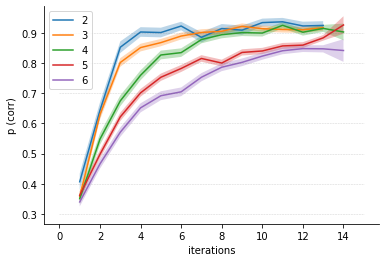

In [8]:
plt.figure()
ax = plt.subplot(111)

for i in range(2, 7):
    plt.plot(list(range(1, 15)), all_set[i], label=str(i))
    plt.fill_between(list(range(1, 15)), [i-j for i, j in zip(all_set[i], sem_set[i])], [i+j for i, j in zip(all_set[i], sem_set[i])], alpha=0.3)

for y in range(30, 100, 10):
     plt.plot([0, 8, 14, 15], [y/100]*4, '--', lw=0.5, color='dimgray', alpha=0.3)

plt.legend()
plt.xlabel('iterations')
plt.ylabel('p (corr)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True) 

In [9]:
np.unique(clean_subj).shape

(90,)

In [76]:
clean_subj.shape[0] == clean_correct.shape[0]

True

In [77]:
all_mean = []
for i in np.unique(clean_subj):
    just_correct = np.where(clean_subj==i)[0]
    test_correct = np.array([i for j, i in enumerate(clean_correct) if j in just_correct])
    all_mean.append(np.mean(test_correct))

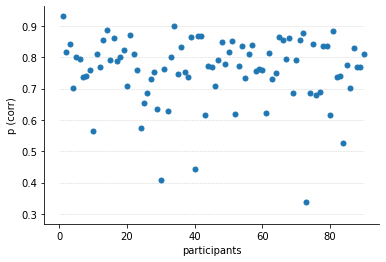

In [78]:
plt.figure()
ax = plt.subplot(111)
plt.plot(list(range(1, 91)), all_mean, '.', color='tab:blue', markersize=10)
for y in range(30, 100, 10):
     plt.plot([0, 8, 14, 90], [y/100]*4, '--', lw=0.5, color='dimgray', alpha=0.3)
plt.xlabel('participants')
plt.ylabel('p (corr)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True) 

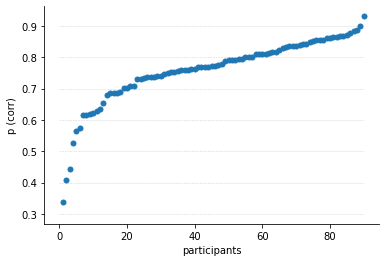

In [79]:
plt.figure()
ax = plt.subplot(111)
plt.plot(list(range(1, 91)), np.sort(all_mean), '.', color='tab:blue', markersize=10)
for y in range(30, 100, 10):
     plt.plot([0, 8, 14, 90], [y/100]*4, '--', lw=0.5, color='dimgray', alpha=0.3)
plt.xlabel('participants')
plt.ylabel('p (corr)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True) 

In [80]:
setxacc = []
setxacc_sem = []
for i in range(2, 7):
    setxacc.append(np.nanmean(all_set[i]))
    setxacc_sem.append(np.nanmean(sem_set[i]))

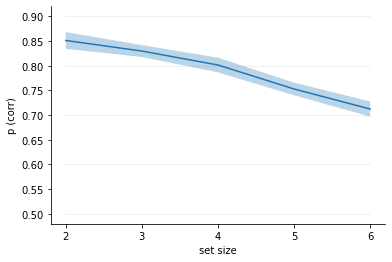

In [81]:
plt.figure()
ax = plt.subplot(111)

plt.plot(list(range(2, 7)), setxacc)
plt.fill_between(list(range(2, 7)), [i-j for i, j in zip(setxacc, setxacc_sem)], [i+j for i, j in zip(setxacc, setxacc_sem)], alpha=0.3)

for y in range(50, 100, 10):
     plt.plot([2, 3, 5, 6], [y/100]*4, '--', lw=0.5, color='dimgray', alpha=0.3)

plt.xlabel('set size')
plt.ylabel('p (corr)')
plt.xticks([2, 3, 4, 5, 6])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True) 

In [82]:
allximg = {}
allximgxste={}
for k in range(2, 7):
    big_set = np.where(clean_setsize==k)[0]
    just_set = clean_img.copy()
    just_correct = clean_correct.copy()
    just_set = np.array([just_set[i] for i in big_set])
    just_correct = np.array([just_correct[i] for i in big_set])
    accximg = {}
    imgste = {}
    for i in np.unique(just_set):
        indiv_idx = np.where(just_set==i)[0]
        indiv_corr = np.array([just_correct[j] for j in indiv_idx])
        accximg[i] = np.mean(indiv_corr)
        imgste[i] = scipy.stats.sem(indiv_corr)
    allximg[k] = accximg
    allximgxste[k] = imgste

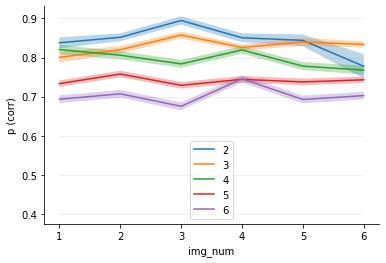

In [83]:
plt.figure()
ax = plt.subplot(111)

for i in range(2, 7):
    plt.plot(list(range(1, 7)), allximg[i].values(), label=str(i))
    plt.fill_between(list(range(1, 7)), [i-j for i, j in zip(allximg[i].values(), allximgxste[i].values())], [i+j for i, j in zip(allximg[i].values(), allximgxste[i].values())], alpha=0.3)

for y in range(40, 100, 10):
     plt.plot([1, 3, 4, 6], [y/100]*4, '--', lw=0.5, color='dimgray', alpha=0.3)

plt.legend()
plt.xlabel('img_num')
plt.ylabel('p (corr)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True) 

In [93]:
clean_correct
clean_setsize
clean_delay



array([ 0,  0,  2, ...,  3, 11,  2])

In [94]:
np.unique(clean_delay)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## Logistic Regression

Logisitic regression performed to analyze the effects of set size, delay and previous correct on proportion correct.

- X (array) : shape is (n of samples, n of features). Should be 3 features
- Y (array): shape is (n of samples,)  

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000, fit_intercept=True)

In [11]:
all_predicitions = dict()
for subj in np.unique(clean_subj):
    subj_idx = np.where(clean_subj==subj)[0]
    subj_set = np.array([i for j, i in enumerate(clean_setsize) if j in subj_idx])
    subj_delay = np.array([i for j, i in enumerate(clean_delay) if j in subj_idx])
    subj_reward = np.array([i for j, i in enumerate(clean_reward) if j in subj_idx])
    subj_correct = np.array([ i for j, i in enumerate(clean_correct) if j in subj_idx])
    X = np.array([subj_set, subj_delay, subj_reward]).T
    print(f'X shape is {X.shape}')
    y = subj_correct
    print(f'y shape is {y.shape}')
    clf.fit(X, y)
    clf.score(X, y)
    reg_predictions = clf.predict(X)
    set_predictions = []
    for l in [2, 3, 4, 5, 6]:
        indiv_set = np.where(subj_set==l)[0]
        mean_correct = []
        for k in np.unique(subj_reward):
            indiv_idx = np.where(subj_reward==k)[0]
            indiv_correct = [i for j, i in enumerate(reg_predictions) if j in indiv_idx and j in indiv_set]
            mean_correct.append(np.mean(indiv_correct))
        set_predictions.append(mean_correct)
    all_predicitions[subj] = np.nan_to_num(np.array(set_predictions))

X shape is (29, 3)
y shape is (29,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (613, 3)
y shape is (613,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (606, 3)
y shape is (606,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (621, 3)
y shape is (621,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (620, 3)
y shape is (620,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (618, 3)
y shape is (618,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (612, 3)
y shape is (612,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (607, 3)
y shape is (607,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (484, 3)
y shape is (484,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (623, 3)
y shape is (623,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (618, 3)
y shape is (618,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (608, 3)
y shape is (608,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (615, 3)
y shape is (615,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (623, 3)
y shape is (623,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)
X shape is (612, 3)
y shape is (612,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (589, 3)
y shape is (589,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (615, 3)
y shape is (615,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (609, 3)
y shape is (609,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (615, 3)
y shape is (615,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (616, 3)
y shape is (616,)
X shape is (499, 3)
y shape is (499,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (498, 3)
y shape is (498,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (300, 3)
y shape is (300,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (612, 3)
y shape is (612,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (615, 3)
y shape is (615,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (587, 3)
y shape is (587,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (317, 3)
y shape is (317,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (606, 3)
y shape is (606,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (606, 3)
y shape is (606,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (596, 3)
y shape is (596,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (623, 3)
y shape is (623,)
X shape is (620, 3)
y shape is (620,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (618, 3)
y shape is (618,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (616, 3)
y shape is (616,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (615, 3)
y shape is (615,)
X shape is (621, 3)
y shape is (621,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (444, 3)
y shape is (444,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (621, 3)
y shape is (621,)
X shape is (624, 3)
y shape is (624,)
X shape is (592, 3)
y shape is (592,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (623, 3)
y shape is (623,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (624, 3)
y shape is (624,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (617, 3)
y shape is (617,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (621, 3)
y shape is (621,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (602, 3)
y shape is (602,)
X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (618, 3)
y shape is (618,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (616, 3)
y shape is (616,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (547, 3)
y shape is (547,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (587, 3)
y shape is (587,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (618, 3)
y shape is (618,)
X shape is (619, 3)
y shape is (619,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (621, 3)
y shape is (621,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (610, 3)
y shape is (610,)
X shape is (561, 3)
y shape is (561,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (613, 3)
y shape is (613,)
X shape is (621, 3)
y shape is (621,)
X shape is (613, 3)
y shape is (613,)
X shape is (624, 3)
y shape is (624,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (605, 3)
y shape is (605,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (616, 3)
y shape is (616,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (623, 3)
y shape is (623,)
X shape is (581, 3)
y shape is (581,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (617, 3)
y shape is (617,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (617, 3)
y shape is (617,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (620, 3)
y shape is (620,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (106, 3)
y shape is (106,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (592, 3)
y shape is (592,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (611, 3)
y shape is (611,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (602, 3)
y shape is (602,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (608, 3)
y shape is (608,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (602, 3)
y shape is (602,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (622, 3)
y shape is (622,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (617, 3)
y shape is (617,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (577, 3)
y shape is (577,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (349, 3)
y shape is (349,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (615, 3)
y shape is (615,)
X shape is (621, 3)
y shape is (621,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (621, 3)
y shape is (621,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (621, 3)
y shape is (621,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (612, 3)
y shape is (612,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


X shape is (621, 3)
y shape is (621,)


/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amanda/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
test = []
for subj in all_predicitions.keys():
    test.append(all_predicitions[subj][:, :11])
test = np.array(test)

In [13]:
test = np.mean(test, axis=0)
print(test.shape)

(5, 11)


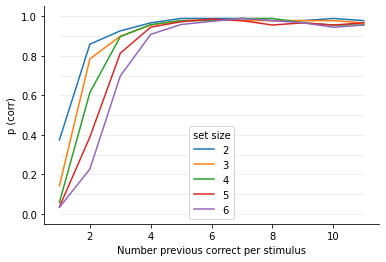

In [14]:
plt.figure()
ax = plt.subplot(111)

for j, i in enumerate([2, 3, 4, 5, 6, ]):
    plt.plot(list(range(1, 12)), test[j], label=str(i))
    
for y in range(0, 110, 10):
     plt.plot([1, 3, 4, 11], [y/100]*4, '--', lw=0.5, color='dimgray', alpha=0.3)
plt.legend(title='set size')
plt.xlabel('Number previous correct per stimulus')
plt.ylabel('p (corr)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True) 

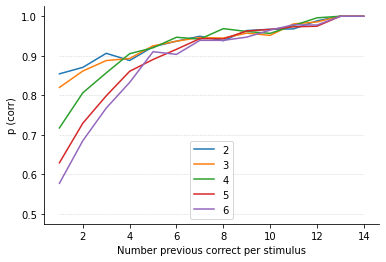

In [92]:
plt.figure()
ax = plt.subplot(111)
for l in [2, 3, 4, 5, 6]:
    indiv_set = np.where(clean_setsize==l)[0]
    mean_correct = []
    for k in np.unique(clean_reward):
        indiv_idx = np.where(clean_reward==k)[0]
        indiv_correct = [i for j, i in enumerate(clean_correct) if j in indiv_idx and j in indiv_set]
        mean_correct.append(np.mean(indiv_correct))
    plt.plot(list(range(1, 15)), mean_correct[1:], label=str(l))

for y in range(50, 100, 10):
     plt.plot([1, 3, 4, 14], [y/100]*4, '--', lw=0.5, color='dimgray', alpha=0.3)

    
plt.legend()
plt.xlabel('Number previous correct per stimulus')
plt.ylabel('p (corr)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True) 